# Notebook to quickly look at mesh data from paramerter table

In [2]:
# imports
import re
import sys
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Read data from file

In [3]:

def read_data(file_name, height=0.6):
    case = f"h_{height}mm".replace(".", ",")
    path = os.path.join(sys.path[0], "..", "ansys", "mesh_size_data", case)
    files = glob.glob("*csv", root_dir=path)
    
    if file_name in files:

        data_path = os.path.join(path, file_name)
        with open(data_path) as f:
            tmp = f.readlines()
        header = tmp[3]

        tmp_header = header.split("- ")
        tmp_header_list = ["name"]
        for ele in tmp_header:
            element = ele.split(",")[0].split("\n")[0]
            tmp_header_list.append(element)
        tmp_header_list.remove(tmp_header_list[0])
        new_cols = tmp_header_list

        data = pd.read_csv(data_path, skiprows=6)

        old_cols = list(data.columns)
        cols = {}
        for idx, ele in enumerate(old_cols):
            cols[ele] = new_cols[idx]

        data.rename(columns=cols, inplace=True)
        
       
        data["Cells"] = data[new_cols[1]] * data[new_cols[2]] 

    else:
        print(f"No file {file_name} in directory. files are {files}")
    return data

def plot_data(data, n_inputs, direction=None):
    inp_vars = list(data.columns)[1:n_inputs]
    out_vars = list(data.columns)[n_inputs+1:-1]
    # print(inp_vars)
    # print(out_vars)
    for ele in out_vars:
        fig, axs = plt.subplots(1, 1, figsize=(6.5,2.4))

        match direction:
            case "r":
                plt.plot(data[inp_vars[0]], data[ele],'bo')
            case "h":
                plt.plot(data[inp_vars[1]], data[ele],'bo')
            case _:
                plt.plot(data["Cells"], data[ele],'bo')

                
        plt.title(ele)
        plt.xlabel("Divisions")

Read data and show table  (h=0.2)

---------------------
h divisions
---------------------


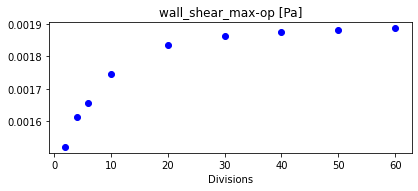

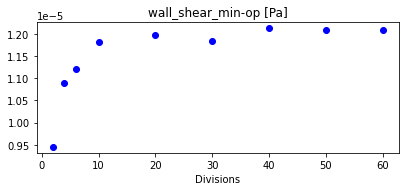

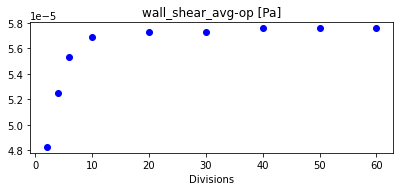

In [4]:
h = 0.2

print("---------------------")
print("h divisions")
print("---------------------")
data = read_data("mesh_data_h.csv", h)
plot_data(data, 3, "h")

---------------------
r divisions
---------------------


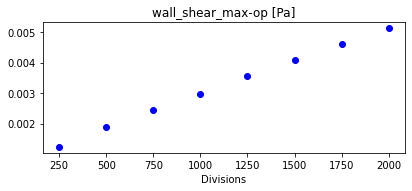

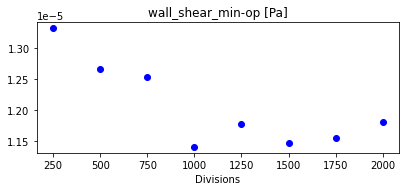

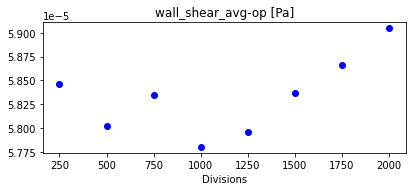

In [5]:
print("---------------------")
print("r divisions")
print("---------------------")
data = read_data("mesh_data_r.csv", h)
plot_data(data, 3, "r")

Show data h=0.4

---------------------
h divisions
---------------------


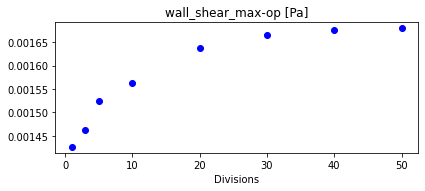

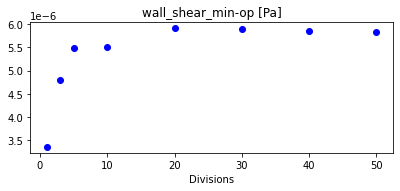

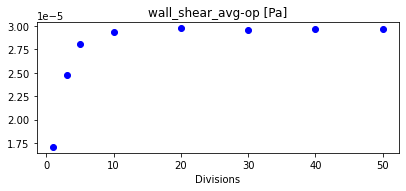

In [6]:
h = 0.4

print("---------------------")
print("h divisions")
print("---------------------")
data = read_data("mesh_data_h.csv", h)
plot_data(data, 3, "h")

---------------------
r divisions
---------------------


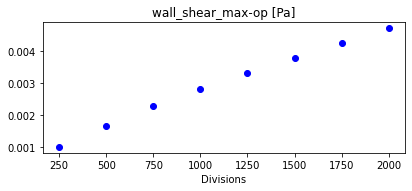

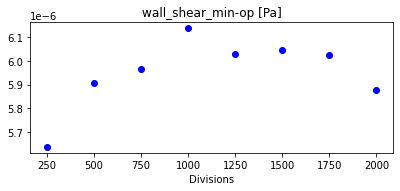

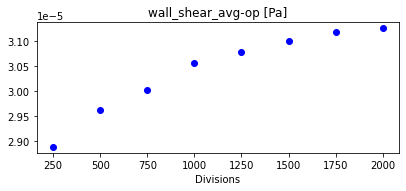

In [7]:
print("---------------------")
print("r divisions")
print("---------------------")
data = read_data("mesh_data_r.csv", h)
plot_data(data, 3, "r")

Show data h=0.2

---------------------
h divisions
---------------------


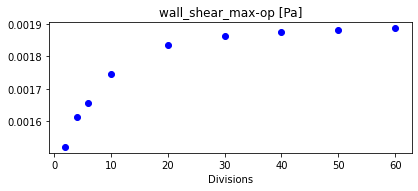

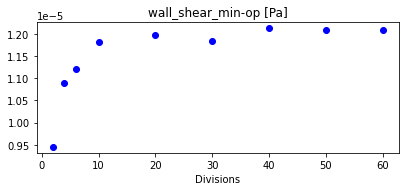

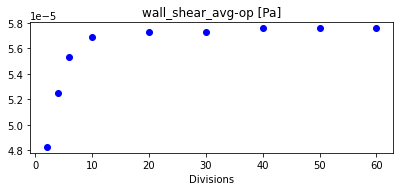

In [8]:
h = 0.2

print("---------------------")
print("h divisions")
print("---------------------")
data = read_data("mesh_data_h.csv", h)
plot_data(data, 3, "h")

In [9]:
data = read_data("mesh_data_h.csv", h)
data.columns
cols = data.columns[1:3]
new_data = data.copy()
new_data = new_data[cols]
new_data["h_new [mm]"] = new_data.shape[0] * [0.2]
new_data["r_new [mm]"] = new_data.shape[0] * [30]
new_data["h_element_size [m]"] = new_data["h_new [mm]"]/new_data[new_data.columns[1]] *1e-3
new_data["r_elements"] = new_data["r_new [mm]"]/(new_data[new_data.columns[-1]]* 1e3)
new_data["total_elements"] = new_data["r_elements"] * new_data[new_data.columns[0]]

new_data

,Edge Sizing Number of Divisions,Edge Sizing 2 Number of Divisions,h_new [mm],r_new [mm],h_element_size [m],r_elements,total_elements
0,500,2,0.2,30,0.000100,300.0,150000.0
1,500,4,0.2,30,0.000050,600.0,300000.0
2,500,6,0.2,30,0.000033,900.0,450000.0
3,500,10,0.2,30,0.000020,1500.0,750000.0
4,500,20,0.2,30,0.000010,3000.0,1500000.0
5,500,30,0.2,30,0.000007,4500.0,2250000.0
6,500,40,0.2,30,0.000005,6000.0,3000000.0
7,500,50,0.2,30,0.000004,7500.0,3750000.0
8,500,60,0.2,30,0.000003,9000.0,4500000.0


---------------------
r divisions
---------------------


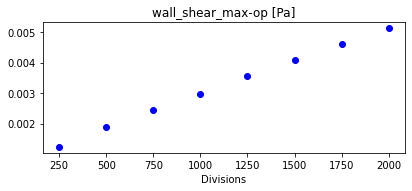

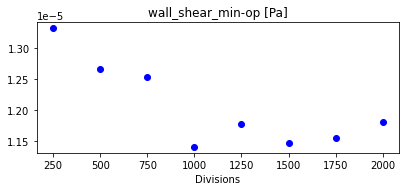

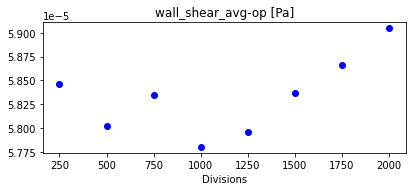

In [10]:
print("---------------------")
print("r divisions")
print("---------------------")
data = read_data("mesh_data_r.csv", h)
plot_data(data, 3, "r")

,Edge Sizing 2 Element Size [mm],wall_shear_max-op [Pa],wall_shear_min-op [Pa],wall_shear_avg-op [Pa],h [mm],r [mm],r_elements,h_elements,cells
0,0.005,0.018922,0.00002,0.000091,0.2,30,6000.0,40.0,240000.0
1,0.010,0.009889,0.00002,0.000090,0.2,30,3000.0,20.0,60000.0
2,0.020,0.005448,0.00002,0.000087,0.2,30,1500.0,10.0,15000.0
3,0.004,0.023319,0.00002,0.000092,0.2,30,7500.0,50.0,375000.0
4,0.002,0.045604,0.00002,0.000094,0.2,30,15000.0,100.0,1500000.0
5,0.001,0.089560,0.00002,0.000096,0.2,30,30000.0,200.0,6000000.0


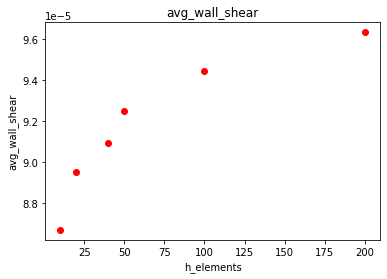

In [16]:
h = 0.2

data = read_data("mesh_data.csv", h)
tmp = data.copy()
cols = tmp.columns
tmp = tmp[cols[3:-1]]
cols = tmp.columns
tmp["h [mm]"] = tmp.shape[0] * [h]
tmp["r [mm]"] = tmp.shape[0] * [30]
tmp["r_elements"] = tmp["r [mm]"]/tmp[cols[0]]
tmp["h_elements"] = tmp["h [mm]"]/tmp[cols[0]]
tmp["cells"] = tmp["r_elements"] * tmp["h_elements"]

x_var = "h_elements"

plt.plot(tmp[x_var], tmp[cols[3]], "ro")
plt.xlabel(x_var)
# plt.xscale("log")
plt.ylabel("avg_wall_shear")
plt.title("avg_wall_shear")

# tmp[tmp["h_elements"] == 100]
tmp

